<a href="https://colab.research.google.com/github/iamsusmita/ExChange/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Download the stock data

stk="^GSPC"
tkr = yf.Ticker(stk)
data=tkr.history(period="max")
data.to_csv(stk+'.csv')


S&P 500


In [ ]:
# Import the dataset
df=pd.read_csv(stk+'.csv')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-21 00:00:00-04:00,5603.089844,5632.680176,5591.569824,5620.850098,3119670000,0.0,0.0
2024-08-22 00:00:00-04:00,5637.770020,5643.220215,5560.950195,5570.640137,2981530000,0.0,0.0
2024-08-23 00:00:00-04:00,5602.490234,5641.819824,5585.160156,5634.609863,3291940000,0.0,0.0


In [ ]:
# Note the Last Day Price
print('The Last Day Price is: ', df[['Close']].tail(1).values[0][0])

The Last Day Price is:  5625.7998046875


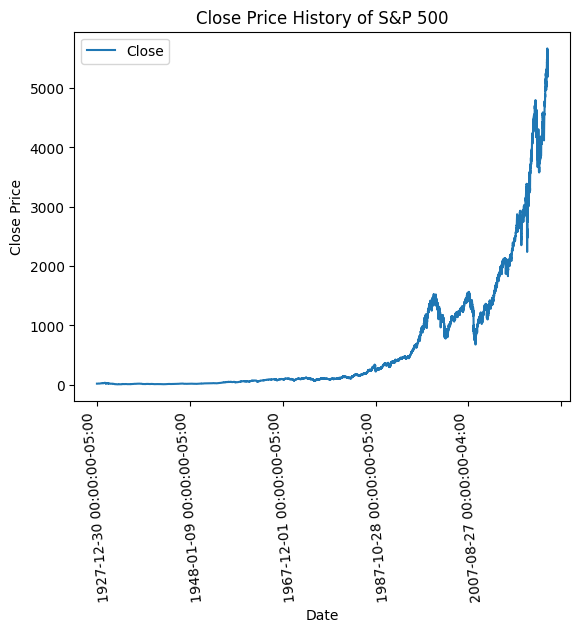

In [ ]:
# Plot the Historical Close Price
df.plot(x="Date", y="Close")
plt.xticks(rotation=95)
plt.title('Close Price History of ' + tkr.info['longName'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

In [ ]:
#create the model
model = RandomForestRegressor()

In [ ]:
#Train the model
feature=df[['Open','High','Low','Volume']]
feature=feature[:int(len(df)-2)]

target=df['Close'].shift(-1)
target=target[:int(len(df)-2)]

model.fit(feature,target)

RandomForestRegressor()

In [ ]:
#Test the model
print('The model score is %: ', format(model.score(feature,target),".0%"))


The model score is %:  100%


In [ ]:
# Make the predictions
new_data=df[["Open","High","Low","Volume"]].tail(2)[0:1]

prediction=model.predict(new_data)


The prediction for last day price to be:  [5631.18887207]
The actual last day Price is:  5625.7998046875
The Accuracy is:  99.90%


In [ ]:
# Print the Results

print('The prediction for last day price to be: ', prediction)

Accuracy = 1-np.abs((prediction/df[['Close']].tail(1).values[0][0])-1)

print('The Accuracy is: ', format(Accuracy[0],".2%"))

The prediction for last day price to be:  [5631.18887207]
The Accuracy is:  99.90%
